# <font color='white'><span style='background:red'> ***P9 : LA POULE QUI CHANTE - PREPARATION, NETTOYAGE ET ANALYSE EXPLORATOIRE - TG*** <span><br><br>

In [1]:
# Importation des librairies
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as st

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Classe couleur pour l'affichage
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [3]:
# Chargement des données
dispo_17 = pd.read_csv('DisponibiliteAlimentaire_2017.csv')
pop = pd.read_csv('Population_2000_2018.csv')
pib = pd.read_csv('PIB.csv')

### <span style='font-family:serif'><font color='darkcyan'> *Le dataset PIB.csv a été télécharger directement sur le site de la FAO (PIB en $ PPA internationaux constants de 2017): https://www.fao.org/faostat/fr/#search/PIB%20par%20habitant%2C%20%24%20PPA%20internationaux%20constants%20de%202017* <br>

## <font color='lateorange'>***1 - Données Population_2000_2018*** <br>

In [4]:
# Aperçu
pop.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [5]:
# Information RAS
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

In [6]:
# Description RAS
pop.describe()

,Code zone,Code Élément,Code Produit,Code année,Année,Valeur
count,4411.000000,4411.0,4411.0,4411.000000,4411.000000,4.411000e+03
mean,132.202902,511.0,3010.0,2009.068238,2009.068238,2.963004e+04
std,75.854840,0.0,0.0,5.481539,5.481539,1.238029e+05
min,1.000000,511.0,3010.0,2000.000000,2000.000000,7.850000e-01
25%,68.000000,511.0,3010.0,2004.000000,2004.000000,3.921890e+02
50%,132.000000,511.0,3010.0,2009.000000,2009.000000,4.764741e+03
75%,195.000000,511.0,3010.0,2014.000000,2014.000000,1.821548e+04
max,299.000000,511.0,3010.0,2018.000000,2018.000000,1.427648e+06


> ### <font color='blue'>***- Calcul du taux de croissance démographique sur 5 ans***

### <span style='font-family:serif'><font color='darkcyan'> *Les colonnes qui nous intéressent ici sont : <font color='red'>"Zone"<font color='darkcyan'>, <font color='red'>"Année" <font color='darkcyan'>et <font color='red'>"Valeur"<font color='darkcyan'>. <br> Nous nous en servirons pour Nous allons extraire le nombre d'habitants par pays en <font color='blue'>2012 <font color='darkcyan'>et <font color='blue'>2017<font color='darkcyan'> afin de calculer la variation de population sur 5 années.*<br>

In [7]:
# Nouvelle variable population_nw en pivotant Zone, Année et Valeur
pop_nw = pop.pivot_table(index='Zone', columns='Année', values='Valeur')

# Créer la colonne Croissance démogaphique (variation de la population entre 2012 et 2017)
pop_nw["Croissance demographique (%)"] = ((pop_nw[2017]-pop_nw[2012]) /pop_nw[2012]) *100
pop_nw.head()

Année,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Croissance demographique (%)
Zone,,,,,,,,,,,,,,,,,,,,
Afghanistan,20779.953,21606.988,22600.770,23680.871,24726.684,25654.277,26433.049,27100.536,27722.276,28394.813,29185.507,30117.413,31161.376,32269.589,33370.794,34413.603,35383.032,36296.113,37171.921,16.477889
Afrique du Sud,44967.708,45571.274,46150.913,46719.196,47291.610,47880.601,48489.459,49119.759,49779.471,50477.011,51216.964,52003.755,52832.658,53687.121,54544.186,55386.367,56207.646,57009.756,57792.518,7.906280
Albanie,3129.243,3129.704,3126.187,3118.023,3104.892,3086.810,3063.021,3033.998,3002.678,2973.048,2948.023,2928.592,2914.096,2903.790,2896.305,2890.513,2886.438,2884.169,2882.740,-1.026974
Algérie,31042.235,31451.514,31855.109,32264.157,32692.163,33149.724,33641.002,34166.972,34730.608,35333.881,35977.455,36661.445,37383.895,38140.133,38923.692,39728.025,40551.392,41389.189,42228.408,10.713956
Allemagne,81400.882,81453.885,81535.122,81614.380,81646.474,81602.741,81472.226,81277.830,81065.752,80899.961,80827.002,80855.632,80972.628,81174.367,81450.378,81787.411,82193.768,82658.409,83124.418,2.081915


In [8]:
# Récupération de la population de 2012 à 2017
pop_f = pop_nw[["Croissance demographique (%)"]]
pop_f.head()

Année,Croissance demographique (%)
Zone,
Afghanistan,16.477889
Afrique du Sud,7.906280
Albanie,-1.026974
Algérie,10.713956
Allemagne,2.081915


## <font color='lateorange'>***2 - Données PIB*** <br>

In [9]:
pib.head(7)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,2,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2012,2012,I$,2075.5,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,2,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2013,2013,I$,2116.5,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,2,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2014,2014,I$,2102.4,X,Ciffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,2,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2015,2015,I$,2068.3,X,Ciffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,2,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2016,2016,I$,2057.1,X,Ciffre de sources internationales,NaN
5,FS,Données de la sécurité alimentaire,2,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,2058.4,X,Ciffre de sources internationales,NaN
6,FS,Données de la sécurité alimentaire,2,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2018,2018,I$,2033.8,X,Ciffre de sources internationales,NaN


In [10]:
# Filtrer sur l'Année en 2017
pib_17 = pib.loc[pib['Année'] == 2017, :]

# Ne garder que les colonnes Zone et Valeur
pib_17 = pib_17[['Zone', 'Valeur']]

# Renommer la colonne Valeur en PIB (%) 
pib_17.rename(columns ={"Valeur":"PIB/hab"}, inplace= True)
pib_17.head()

,Zone,PIB/hab
5,Afghanistan,2058.4
15,Afrique du Sud,13860.3
26,Albanie,12771.0
37,Algérie,11737.4
48,Allemagne,53071.5


In [11]:
# Description RAS
#pib_17.describe()

In [12]:
# Information RAS
#pib_17.info()
#pib_17.isnull().sum() #RAS

## <font color='lateorange'>***3 - Données DisponibiliteAlimentaire_2017*** <br>

In [13]:
dispo_17.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [14]:
# Info pour vérifier les anomalies
#dispo_17.info() #RAS

In [15]:
# Description
#dispo_17.describe() #RAS

In [16]:
# Ne Gardons que les colonnes utiles : Zone, Element, Produit, Valeur
dispo_nw = dispo_17[['Zone', 'Élément', 'Produit', 'Valeur']]
dispo_nw.head()

,Zone,Élément,Produit,Valeur
0,Afghanistan,Production,Blé et produits,4281.0
1,Afghanistan,Importations - Quantité,Blé et produits,2302.0
2,Afghanistan,Variation de stock,Blé et produits,-119.0
3,Afghanistan,Exportations - Quantité,Blé et produits,0.0
4,Afghanistan,Disponibilité intérieure,Blé et produits,6701.0


In [17]:
#dispo_17.isnull().sum() #RAS
#dispo_nw['Produit'].unique()

In [18]:
# Filter les Produits sur 'Viande de Volailles'
dispo_v = dispo_nw.loc[dispo_nw['Produit'] == 'Viande de Volailles']
dispo_v.head()

,Zone,Élément,Produit,Valeur
651,Afghanistan,Production,Viande de Volailles,28.0
652,Afghanistan,Importations - Quantité,Viande de Volailles,29.0
653,Afghanistan,Variation de stock,Viande de Volailles,0.0
654,Afghanistan,Disponibilité intérieure,Viande de Volailles,57.0
655,Afghanistan,Pertes,Viande de Volailles,2.0


In [19]:
# Vérifier les valeurs nulls
#dispo_v.info()
#dispo_v.isnull().sum() RAS

In [20]:
# Pivoter la colonne Element par Zone en donnant les valeurs
dispo_vp = dispo_v.pivot_table(index='Zone', columns='Élément', values='Valeur')
#dispo_vp.head()

# Vérifier le nombre de valeurs nulls par colonne
dispo_vp.isnull().sum()

Élément
Alimentation pour touristes                                       94
Aliments pour animaux                                            171
Autres utilisations (non alimentaire)                            138
Disponibilité alimentaire (Kcal/personne/jour)                     0
Disponibilité alimentaire en quantité (kg/personne/an)             0
Disponibilité de matière grasse en quantité (g/personne/jour)      0
Disponibilité de protéines en quantité (g/personne/jour)           0
Disponibilité intérieure                                           2
Exportations - Quantité                                           37
Importations - Quantité                                            2
Nourriture                                                         2
Pertes                                                           105
Production                                                         4
Résidus                                                            8
Semences                  

In [21]:
# Remplacer les valeurs nulls par des valeurs moyennes
dispo_vp = dispo_vp.fillna(dispo_vp.mean())
dispo_vp.head()

Élément,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,,,
Afghanistan,0.217949,0.0,44.117647,5.0,1.53,0.33,0.54,57.0,132.185185,29.0,55.0,2.00000,28.0,0.0,0.0,26.282609,0.0
Afrique du Sud,0.000000,0.0,44.117647,143.0,35.69,9.25,14.11,2118.0,63.000000,514.0,2035.0,83.00000,1667.0,0.0,0.0,26.282609,0.0
Albanie,0.217949,0.0,44.117647,85.0,16.36,6.45,6.26,47.0,0.000000,38.0,47.0,43.58209,13.0,0.0,0.0,26.282609,4.0
Algérie,0.000000,0.0,44.117647,22.0,6.38,1.50,1.97,277.0,0.000000,2.0,264.0,13.00000,275.0,0.0,0.0,26.282609,0.0
Allemagne,0.217949,0.0,44.117647,71.0,19.47,4.16,7.96,1739.0,646.000000,842.0,1609.0,43.58209,1514.0,-38.0,0.0,167.000000,-29.0


## <font color='blue'>***On sait que:*** 
   
   <font color='darkcyan'>**-DISPONIBILITE INTERIEUR** <font color='red'>= <font color='darkcyan'>Production <font color='red'>+ <font color='darkcyan'>importations <font color='red'>- <font color='darkcyan'>exportations <font color='red'>+ <font color='darkcyan'>variations des stocks (baisse ou augmentation) <br>
       <font color='darkcyan'>**-Taux de dépendance aux importations (TDI)** <font color='red'>= <font color='blue'>(<font color='darkcyan'>Importation <font color='red'>÷ <font color='darkcyan'>Disponibilité intérieure<font color='blue'>) <font color='red'>x <font color='darkcyan'>100<br> 
   <font color='darkcyan'>**-Taux d'auto-suffisance (TAS)** <font color='red'>= <font color='blue'>(<font color='darkcyan'>Production <font color='red'>÷ <font color='darkcyan'>Disponibilité intérieure<font color='blue'>)<font color='red'> x <font color='darkcyan'>100 <br>

### <span style='font-family:serif'><font color='red'>*Plus le TDI est élevé plus la dépendance du pays à l'importation est forte*
    
### <span style='font-family:serif'><font color='red'>*Plus le TAS est élevé plus le pays est auto-suffisant. C'est à dire la production est forte également*<br>

In [22]:
# Créer les colonnes TDI et TAS en %
dispo_vp['TDI (%)'] = (dispo_vp['Importations - Quantité'] / dispo_vp['Disponibilité intérieure']) *100
dispo_vp['TAS (%)'] = (dispo_vp['Production'] / dispo_vp['Disponibilité intérieure']) *100
dispo_vp.head()

Élément,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock,TDI (%),TAS (%)
Zone,,,,,,,,,,,,,,,,,,,
Afghanistan,0.217949,0.0,44.117647,5.0,1.53,0.33,0.54,57.0,132.185185,29.0,55.0,2.00000,28.0,0.0,0.0,26.282609,0.0,50.877193,49.122807
Afrique du Sud,0.000000,0.0,44.117647,143.0,35.69,9.25,14.11,2118.0,63.000000,514.0,2035.0,83.00000,1667.0,0.0,0.0,26.282609,0.0,24.268178,78.706327
Albanie,0.217949,0.0,44.117647,85.0,16.36,6.45,6.26,47.0,0.000000,38.0,47.0,43.58209,13.0,0.0,0.0,26.282609,4.0,80.851064,27.659574
Algérie,0.000000,0.0,44.117647,22.0,6.38,1.50,1.97,277.0,0.000000,2.0,264.0,13.00000,275.0,0.0,0.0,26.282609,0.0,0.722022,99.277978
Allemagne,0.217949,0.0,44.117647,71.0,19.47,4.16,7.96,1739.0,646.000000,842.0,1609.0,43.58209,1514.0,-38.0,0.0,167.000000,-29.0,48.418631,87.061530


In [23]:
# Dataset dispo finale avec les colonnes utiles pour l'analyse et la fusion
dispo = dispo_vp.loc[:,['Disponibilité intérieure',
                        'Disponibilité alimentaire en quantité (kg/personne/an)',
                        'Disponibilité alimentaire (Kcal/personne/jour)',
                        'Disponibilité de protéines en quantité (g/personne/jour)','TAS (%)','TDI (%)']]
# Renommer les colonnes 
dispo.rename(columns ={"Disponibilité alimentaire en quantité (kg/personne/an)":"Dispo_quanti_kg/pers/an",
                       "Disponibilité alimentaire (Kcal/personne/jour)": "Dispo_alim_Kcal/pers/jr",
                       "Disponibilité de protéines en quantité (g/personne/jour)": "Dispo_prot_g/pers/jr"
                        }, inplace= True)
dispo.head()

Élément,Disponibilité intérieure,Dispo_quanti_kg/pers/an,Dispo_alim_Kcal/pers/jr,Dispo_prot_g/pers/jr,TAS (%),TDI (%)
Zone,,,,,,
Afghanistan,57.0,1.53,5.0,0.54,49.122807,50.877193
Afrique du Sud,2118.0,35.69,143.0,14.11,78.706327,24.268178
Albanie,47.0,16.36,85.0,6.26,27.659574,80.851064
Algérie,277.0,6.38,22.0,1.97,99.277978,0.722022
Allemagne,1739.0,19.47,71.0,7.96,87.061530,48.418631


> ### <font color='blue'>**Vérification des valeurs TAS (Pour Outliers plus tard)**

In [24]:
# Verification des données pour Djibouti  
dispo_vp.loc["Djibouti"]

Élément
Alimentation pour touristes                                          0.217949
Aliments pour animaux                                                0.000000
Autres utilisations (non alimentaire)                               44.117647
Disponibilité alimentaire (Kcal/personne/jour)                       9.000000
Disponibilité alimentaire en quantité (kg/personne/an)               2.680000
Disponibilité de matière grasse en quantité (g/personne/jour)        0.590000
Disponibilité de protéines en quantité (g/personne/jour)             0.920000
Disponibilité intérieure                                             3.000000
Exportations - Quantité                                            132.185185
Importations - Quantité                                              3.000000
Nourriture                                                           3.000000
Pertes                                                              43.582090
Production                                              

In [25]:
# Verification des données pour Maldives
dispo_vp.loc["Maldives"]

Élément
Alimentation pour touristes                                         5.000000
Aliments pour animaux                                               0.000000
Autres utilisations (non alimentaire)                              44.117647
Disponibilité alimentaire (Kcal/personne/jour)                     47.000000
Disponibilité alimentaire en quantité (kg/personne/an)             13.500000
Disponibilité de matière grasse en quantité (g/personne/jour)       2.940000
Disponibilité de protéines en quantité (g/personne/jour)            4.700000
Disponibilité intérieure                                           12.000000
Exportations - Quantité                                           132.185185
Importations - Quantité                                            12.000000
Nourriture                                                          7.000000
Pertes                                                             43.582090
Production                                                        72

### <span style='font-family:serif'><font color='blue'> ***Les 2 pays présentent un taux de Production très élevé (725.190476) avec une disponibilité intérieure de 3 et 12.***

## <font color='lateorange'>***4 - Les jointures*** <br>

In [26]:
# Jointure interne entre pop_f et dispo
data_1 = dispo.merge(pop_f, on='Zone', how='inner')
data_1.head()

,Disponibilité intérieure,Dispo_quanti_kg/pers/an,Dispo_alim_Kcal/pers/jr,Dispo_prot_g/pers/jr,TAS (%),TDI (%),Croissance demographique (%)
Zone,,,,,,,
Afghanistan,57.0,1.53,5.0,0.54,49.122807,50.877193,16.477889
Afrique du Sud,2118.0,35.69,143.0,14.11,78.706327,24.268178,7.906280
Albanie,47.0,16.36,85.0,6.26,27.659574,80.851064,-1.026974
Algérie,277.0,6.38,22.0,1.97,99.277978,0.722022,10.713956
Allemagne,1739.0,19.47,71.0,7.96,87.061530,48.418631,2.081915


In [27]:
# Jointure entre data_1 et pib
data_final = data_1.merge(pib_17, on='Zone', how='inner')
#data_final = data_1.merge(pib, on='Zone', how='inner')
data_final.set_index('Zone', inplace=True)
data_final.head()

,Disponibilité intérieure,Dispo_quanti_kg/pers/an,Dispo_alim_Kcal/pers/jr,Dispo_prot_g/pers/jr,TAS (%),TDI (%),Croissance demographique (%),PIB/hab
Zone,,,,,,,,
Afghanistan,57.0,1.53,5.0,0.54,49.122807,50.877193,16.477889,2058.4
Afrique du Sud,2118.0,35.69,143.0,14.11,78.706327,24.268178,7.906280,13860.3
Albanie,47.0,16.36,85.0,6.26,27.659574,80.851064,-1.026974,12771.0
Algérie,277.0,6.38,22.0,1.97,99.277978,0.722022,10.713956,11737.4
Allemagne,1739.0,19.47,71.0,7.96,87.061530,48.418631,2.081915,53071.5


In [28]:
# data_f avec le pib en %
#data_f = data_final.merge(pib2, on='Zone', how='inner')
#data_f.head()

In [29]:
# Description RAS
data_final.describe()

,Disponibilité intérieure,Dispo_quanti_kg/pers/an,Dispo_alim_Kcal/pers/jr,Dispo_prot_g/pers/jr,TAS (%),TDI (%),Croissance demographique (%),PIB/hab
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,599.172934,20.065092,74.079755,7.075337,262.375958,44.892655,7.216234,20129.739877
std,1757.016006,15.948526,61.142818,5.638720,1941.986476,51.499793,6.614919,20687.412436
min,2.000000,0.130000,0.000000,0.040000,0.000000,0.000000,-7.030485,912.800000
25%,31.000000,6.185000,21.000000,1.970000,41.463415,4.547620,2.423338,4975.850000
50%,98.000000,17.620000,62.000000,6.320000,89.230769,24.242424,6.267105,13102.100000
75%,366.000000,29.640000,104.500000,10.220000,100.000000,78.882859,11.576309,28639.250000
max,18266.000000,72.310000,243.000000,27.870000,24173.015873,323.928571,33.387345,126144.000000


In [30]:
# Information RAS
data_final.info()
data_final.isnull().sum() # RAS

<class 'pandas.core.frame.DataFrame'>
Index: 163 entries, Afghanistan to Îles Salomon
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Disponibilité intérieure      163 non-null    float64
 1   Dispo_quanti_kg/pers/an       163 non-null    float64
 2   Dispo_alim_Kcal/pers/jr       163 non-null    float64
 3   Dispo_prot_g/pers/jr          163 non-null    float64
 4   TAS (%)                       163 non-null    float64
 5   TDI (%)                       163 non-null    float64
 6   Croissance demographique (%)  163 non-null    float64
 7   PIB/hab                       163 non-null    float64
dtypes: float64(8)
memory usage: 11.5+ KB


Disponibilité intérieure        0
Dispo_quanti_kg/pers/an         0
Dispo_alim_Kcal/pers/jr         0
Dispo_prot_g/pers/jr            0
TAS (%)                         0
TDI (%)                         0
Croissance demographique (%)    0
PIB/hab                         0
dtype: int64

## <font color='lateorange'>***5 -Vérification des Outliers***<br>

In [31]:
#data_final.head()

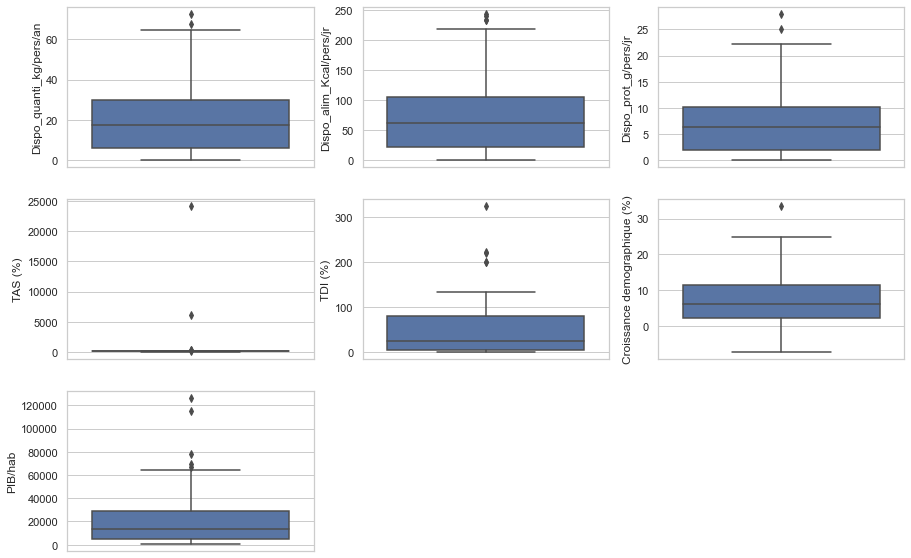

In [32]:
# Vérification par boxplot
plt.figure(figsize=(15,10))
sns.set(style="whitegrid")

plt.subplot(331)
sns.boxplot(data=data_final,  y='Dispo_quanti_kg/pers/an')
plt.subplot(332)
sns.boxplot(data=data_final,  y='Dispo_alim_Kcal/pers/jr')
plt.subplot(333)
sns.boxplot(data=data_final,  y='Dispo_prot_g/pers/jr')
plt.subplot(334)
sns.boxplot(data=data_final, y='TAS (%)')
plt.subplot(335)
sns.boxplot(data=data_final,y='TDI (%)')
plt.subplot(336)
sns.boxplot(data=data_final,y='Croissance demographique (%)')
plt.subplot(337)
sns.boxplot(data=data_final, y='PIB/hab')

plt.show()

In [33]:
# Afficher les valeurs extremes de l'auto-suffisance sur TAS (%)
data_final.sort_values(by = ['TAS (%)'], ascending = False).head()

,Disponibilité intérieure,Dispo_quanti_kg/pers/an,Dispo_alim_Kcal/pers/jr,Dispo_prot_g/pers/jr,TAS (%),TDI (%),Croissance demographique (%),PIB/hab
Zone,,,,,,,,
Djibouti,3.0,2.68,9.0,0.92,24173.015873,100.000000,8.750001,4905.0
Maldives,12.0,13.50,47.0,4.70,6043.253968,100.000000,24.963687,18057.9
Belgique,152.0,12.65,44.0,4.57,304.605263,222.368421,3.016502,50442.3
Pologne,1156.0,30.30,107.0,12.14,203.373702,4.757785,-0.716414,30064.5
Thaïlande,881.0,12.95,47.0,4.35,190.238365,0.227015,2.025250,17423.0


### <span style='font-family:serif'><font color='blue'> *On peut aperçevoir clairement qu'il y a 2 valeurs qui sortent du lot sur les taux t'auto-suffisance : Djibouti(24173.015873) et Maldives(6043.253968).<br> <font color='darkcyan'> Ces chiffres peuvent s'expliquer par le fait que ces pays produissent beaucoup (taux de production élevé : 725.190476) alors qu'ils ont de faibles disponibilités intérieurs (3 et 12). <br><font color='red'><br> <br> <span style='font-family:serif'><font color='blue'> Nous allons donc supprimer ces 2 valeurs aberrantes.*<br> 

In [34]:
# Supprimer les 2 pays qui représentent des outliers
data_f = data_final.drop(['Djibouti','Maldives'])
data_f.head()

,Disponibilité intérieure,Dispo_quanti_kg/pers/an,Dispo_alim_Kcal/pers/jr,Dispo_prot_g/pers/jr,TAS (%),TDI (%),Croissance demographique (%),PIB/hab
Zone,,,,,,,,
Afghanistan,57.0,1.53,5.0,0.54,49.122807,50.877193,16.477889,2058.4
Afrique du Sud,2118.0,35.69,143.0,14.11,78.706327,24.268178,7.906280,13860.3
Albanie,47.0,16.36,85.0,6.26,27.659574,80.851064,-1.026974,12771.0
Algérie,277.0,6.38,22.0,1.97,99.277978,0.722022,10.713956,11737.4
Allemagne,1739.0,19.47,71.0,7.96,87.061530,48.418631,2.081915,53071.5


## <font color='lateorange'>***6 - Exportation du fichier final*** <br>

In [35]:
# Exportation du data_final en fichier .csv
#write.csv(data_final,"data.csv", row.names = FALSE)
data = data_f.to_csv('data_p9.csv', index = True)
print('\nCSV String:\n', data)


CSV String:
 None
